Running for many wavelengths - this may take a long time


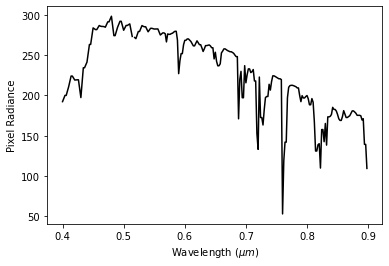

In [1]:
from pyeosim import datasets
import matplotlib.pyplot as plt
import xarray
import numpy as np
from Py6S import *
# Create a SixS object called s (used as the standard name by convention)
s = SixS()
s.ground_reflectance = GroundReflectance.HomogeneousLambertian(1)
geom = Geometry.User()
geom.from_time_and_location(lat=52.04, lon=0.76, datetimestring='2020/06/22T12:00',
                            view_z=0, view_a=0)
s.geometry = geom

s.altitudes.set_sensor_satellite_level()

# Run the 6S simulation defined by this SixS object across the
# whole VNIR range
wavelengths1, results1 = SixSHelpers.Wavelengths.run_wavelengths(s, np.arange(400,900,2)/1000,
                                                               output_name='pixel_radiance')
# Plot these results, with the y axis label set to "Pixel Radiance"
SixSHelpers.Wavelengths.plot_wavelengths(wavelengths1, results1, "Pixel Radiance")

In [2]:
ref_100 = xarray.DataArray(results1, [('wavelength', wavelengths1*1000)]).interp(
    wavelength = np.arange(400,900,1)
).interpolate_na('wavelength')

rho = np.arange(0,1,.001)
output = np.empty(shape=(len(rho), 500))

for i, _rho in enumerate(rho):
    _res = ref_100* _rho
    output[i,:] = _res

LUT = xarray.DataArray(output,[('rho', rho),('wavelength', np.arange(400,900,1))])

In [3]:
from pyeosim.detector import genericCCD
from pyeosim.atmosphere import SixS

In [210]:
fpath = '../georis/georis/TEST_dataset/TEST collect/TEST-1-20200621/L3_rect/TEST-1-20200622-1_06_VNIR_1800_SN00826_quac_specPol_rectGe.img'
im = xarray.open_rasterio(fpath)
im = im.assign_coords(wavelength=('band',[float(x[:6]) for x in im.descriptions]))
im = im.swap_dims({'band':'wavelength'})
im_ref = im.sel(wavelength=slice(400,800))/10000


In [5]:
generic_LUT = SixS(LUT_object=LUT)

In [211]:
TOA = generic_LUT.transform(im_ref)

In [181]:
_TOA = TOA.copy()

In [230]:
from pyeosim import _detector
ccd = genericCCD(.001, dark_noise=5, readout_noise=50, sensitivity=.001, pixel_area=15, bit_depth=12)

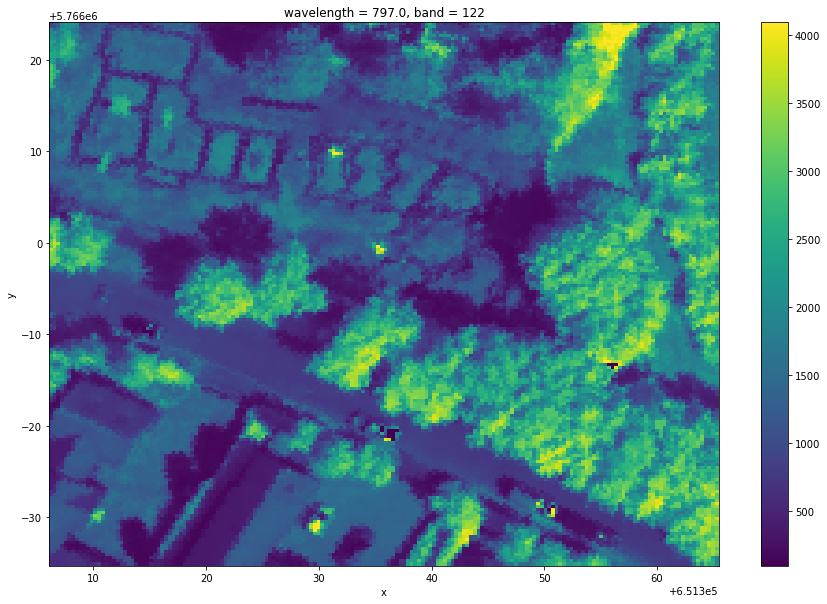

In [231]:
ccd.transform(_TOA).isel(wavelength=-1).astype(int).plot(size=10)

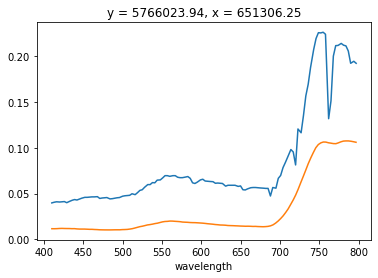

In [233]:
ref = generic_LUT.transform(xarray.ones_like(_TOA))
out = ccd.transform(TOA)/ccd.transform(ref).mean(['x','y'])
out['wavelength'] = out.wavelength.astype(float)
out.isel(x=0,y=0).plot()
im_ref.isel(x=0,y=0).plot()


In [8]:
photons.pipe(
    _detector.photon_mean, ccd.pixel_area, ccd.integration_time).pipe(
    _detector.add_photon_noise
)

<xarray.DataArray (wavelength: 122, y: 180, x: 180)>
array([[[  2764817,   1610762,   1611380, ...,   2533313,   2532668,
           3222183],
        [  1841764,   1383216,   2071296, ...,   2303091,   2765585,
           3452992],
        [  3683245,   2303704,   2302886, ...,   2760931,   2996526,
           3222354],
        ...,
        [  6910487,   7365941,   7593829, ...,   4372249,   7135503,
           6908421],
        [  6901888,   7369470,   7596349, ...,   4371825,   5757064,
           6908194],
        [  7598643,   7369312,   7596565, ...,   6213842,   5760993,
           7598057]],

       [[  2916074,   1696011,   1699704, ...,   2672002,   2913828,
           3398314],
        [  1941945,   1459377,   2185487, ...,   2669988,   2911946,
           3642686],
        [  3641137,   2429105,   2427954, ...,   2914221,   3401724,
           3641069],
...
        [ 33719681,  32891217,  33722279, ..., 199023537, 147363392,
         116560828],
        [ 32883738,  32474729,  33721663, ..., 184034290, 163202867,
         116582691],
        [ 32479431,  32474746,  33308714, ..., 157383031, 163188699,
         121988684]],

       [[ 44495777,  71787663,  80592832, ..., 164541351, 180087572,
         139364051],
        [ 60854014,  56672693,  75978261, ..., 164138614, 174619315,
         159088022],
        [120081491,  85638344, 100726362, ..., 162851981, 144826322,
         155746669],
        ...,
        [ 34426370,  33583223,  33584457, ..., 200236193, 148199904,
         117117991],
        [ 33154419,  33152916,  33571244, ..., 185119088, 164564374,
         117103441],
        [ 32739521,  33168537,  34008032, ..., 158671272, 164547167,
         122572153]]])
Coordinates:
  * wavelength  (wavelength) int64 410 413 416 420 423 ... 784 787 790 794 797
    band        (wavelength) int64 1 2 3 4 5 6 7 ... 116 117 118 119 120 121 122
  * y           (y) float64 5.766e+06 5.766e+06 ... 5.766e+06 5.766e+06
  * x           (x) float64 6.513e+05 6.513e+05 ... 6.514e+05 6.514e+05

In [11]:
ccd.transform(photons)

AttributeError: 'numpy.ndarray' object has no attribute 'pipe'

In [ ]:
signal = 

In [ ]:
detector.transform()

In [85]:
s.altitudes.set_sensor_custom_altitude(100)

ValueError: Sensor altitude must be > 0km and < 100km

In [64]:
ar = xarray.open_dataset(datasets.DATA_PATHS['TEST_HSI'])

In [75]:
alt = Altitudes()
alt.set_sensor_satellite_level(500)

TypeError: set_sensor_satellite_level() takes 1 positional argument but 2 were given

In [32]:
wavelength = np.arange(400,900,2)/1000


In [71]:
output = np.empty(shape=(len(rho), len(wavelength)))

for i, _rho in enumerate(rho):
    _, _res = SixSHelpers.Wavelengths.run_wavelengths(s, wavelength,
                                                      output_name='pixel_radiance')
    output[i,:] = _res

Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time
Running for many wavelengths - 

KeyboardInterrupt: 

In [21]:
spx1 = (xarray.open_dataset(datasets.TEST_HSI, chunks=6).reflectance/10000).swap_dims(
        {'band': 'wavelength'}
    )

In [128]:
import pandas, os

In [161]:
def _load_srf(fpath):
    df = pandas.read_csv(fpath, header=None)
    wlen = df[0].astype(float)
    resp = df[1].astype(float)
    new_wlen = np.arange(np.ceil(wlen.min()),np.floor(wlen.max()),1)
    ar = xarray.DataArray(resp, [('wavelength', wlen)]).interp(wavelength=new_wlen)
    ar.name = 'response'
    return ar

In [162]:
np.floor(np.array([1,2,3]))

array([1., 2., 3.])

In [167]:
_load_srf(os.path.join(datasets.HERE, 'data', 'ccd_qe_std_back.csv'))

<xarray.DataArray 'response' (wavelength: 700)>
array([0.35309883, 0.35511558, 0.35713233, 0.35914908, 0.36116583,
       0.36318258, 0.36519933, 0.36721608, 0.36923283, 0.37124958,
       0.37439978, 0.37804113, 0.38168249, 0.38532384, 0.3889652 ,
       0.39260655, 0.39624791, 0.39988926, 0.40353062, 0.40635678,
       0.40887772, 0.41139866, 0.4139196 , 0.41644054, 0.41896147,
       0.42148241, 0.42400335, 0.42652429, 0.42904523, 0.43156616,
       0.43478757, 0.43822522, 0.44166286, 0.4451005 , 0.44853815,
       0.45197579, 0.45541343, 0.45885107, 0.46228872, 0.46572636,
       0.469164  , 0.47186767, 0.47438861, 0.47690955, 0.47943049,
       0.48195142, 0.48447236, 0.4869933 , 0.48951424, 0.49203518,
       0.49455611, 0.5023325 , 0.51115578, 0.51997906, 0.52880235,
       0.53762563, 0.54644891, 0.553581  , 0.56042355, 0.56726609,
       0.57410864, 0.58095118, 0.58779373, 0.59463628, 0.59916248,
       0.60336404, 0.60756561, 0.61176717, 0.61596873, 0.6201703 ,
       0.62437186, 0.62857342, 0.63277499, 0.63697655, 0.64117811,
       0.64537968, 0.6538191 , 0.66264238, 0.67146566, 0.68028894,
       0.68911223, 0.69793551, 0.70242881, 0.70663037, 0.71083194,
       0.7150335 , 0.71923506, 0.72343663, 0.72763819, 0.73183975,
       0.73604132, 0.74268007, 0.74940257, 0.75612507, 0.76284757,
       0.76957007, 0.77629257, 0.78384422, 0.79140704, 0.79896985,
...
       0.26549414, 0.26347739, 0.26146064, 0.25944389, 0.25742714,
       0.25541039, 0.25339363, 0.25137688, 0.24936013, 0.24734338,
       0.24532663, 0.24330988, 0.24129313, 0.23927638, 0.23725963,
       0.23524288, 0.23322613, 0.23120938, 0.22919263, 0.22717588,
       0.22515913, 0.22314238, 0.22112563, 0.21910888, 0.21682727,
       0.21445463, 0.21208198, 0.20970933, 0.20733668, 0.20496404,
       0.20259139, 0.20021874, 0.19784609, 0.19547345, 0.1931008 ,
       0.19072815, 0.1883555 , 0.18598286, 0.18361021, 0.18123756,
       0.17886491, 0.1771809 , 0.17566834, 0.17415578, 0.17264322,
       0.17113065, 0.16961809, 0.16810553, 0.16659296, 0.1650804 ,
       0.16356784, 0.16205528, 0.16054271, 0.15903015, 0.15751759,
       0.15600503, 0.15404323, 0.15200247, 0.14996171, 0.14792095,
       0.14588019, 0.14383944, 0.14179868, 0.13975792, 0.13771716,
       0.1356764 , 0.13363564, 0.13159488, 0.12955412, 0.12751336,
       0.1254726 , 0.12343184, 0.12139108, 0.11935032, 0.11730956,
       0.1152688 , 0.11322804, 0.11139497, 0.1095799 , 0.10776482,
       0.10594975, 0.10413467, 0.1023196 , 0.10050452, 0.09868945,
       0.09687437, 0.0950593 , 0.09324422, 0.09142915, 0.08961407,
       0.08779899, 0.08598392, 0.08416884, 0.08235377, 0.08053869,
       0.07872362, 0.07690854, 0.07509347, 0.07327839, 0.07146332])
Coordinates:
  * wavelength  (wavelength) float64 300.0 301.0 302.0 ... 997.0 998.0 999.0

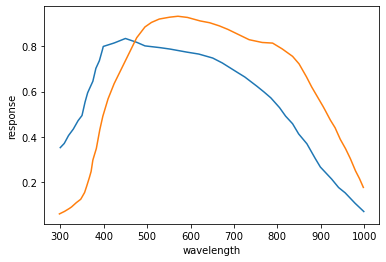

In [164]:
_load_srf(os.path.join(datasets.HERE, 'data', 'ccd_std_back.csv')).plot()
_load_srf(os.path.join(datasets.HERE, 'data', 'ccd_dd_back.csv')).plot()

In [165]:
pandas.read_csv(os.path.join(datasets.HERE, 'data', 'ccd_std_back.csv'), header=None)[0]

0      299.335548
1      309.302326
2      318.272425
3      329.235880
4      340.199336
5      350.166113
6      356.146179
7      363.122924
8      375.083056
9      381.063123
10     390.033223
11     396.013289
12     399.003322
13     423.920266
14     449.833887
15     473.754153
16     494.684385
17     518.604651
18     548.504983
19     583.388704
20     617.275748
21     650.166113
22     671.096346
23     698.006645
24     723.920266
25     744.850498
26     764.784053
27     784.717608
28     804.651163
29     818.604651
30     834.551495
31     848.504983
32     867.441860
33     881.395349
34     898.338870
35     923.255814
36     940.199336
37     955.149502
38     976.079734
39    1000.996678
Name: 0, dtype: float64

In [33]:
spa = spatial.GaussianIsotropic(ground_sample_distance=.33)

In [36]:
spx1.pipe(spa.transform).compute().integrate(dim=['wavelength', 'x','y'])

<xarray.DataArray ()>
array(-212.55917931)

In [123]:
spx1.round(0).values

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

In [114]:
np.random.poisson([[1,2,3],[4,5,6]],)

array([[ 6,  0,  2],
       [ 6,  7, 10]])

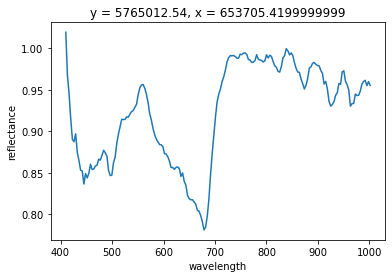

In [118]:
(spx1.isel(x=0,y=0) / spx1).isel(x=1,y=0).plot()

In [90]:
spx1

<xarray.DataArray 'reflectance' (wavelength: 186, y: 6, x: 6)>
dask.array<truediv, shape=(186, 6, 6), dtype=float64, chunksize=(6, 6, 6), chunktype=numpy.ndarray>
Coordinates:
    band        (wavelength) int64 1 2 3 4 5 6 7 ... 180 181 182 183 184 185 186
  * y           (y) float64 5.765e+06 5.765e+06 ... 5.765e+06 5.765e+06
  * x           (x) float64 6.537e+05 6.537e+05 ... 6.537e+05 6.537e+05
    fwhm        (wavelength) float64 dask.array<chunksize=(6,), meta=np.ndarray>
  * wavelength  (wavelength) float64 410.1 413.3 416.5 ... 995.0 998.2 1.001e+03

In [37]:
spx1.compute().integrate(dim=['wavelength', 'x','y'])

<xarray.DataArray 'reflectance' ()>
array(-212.30547102)

In [98]:
2e-25

2e-25

In [107]:
spx_1 = xarray.ones_like(spx1)

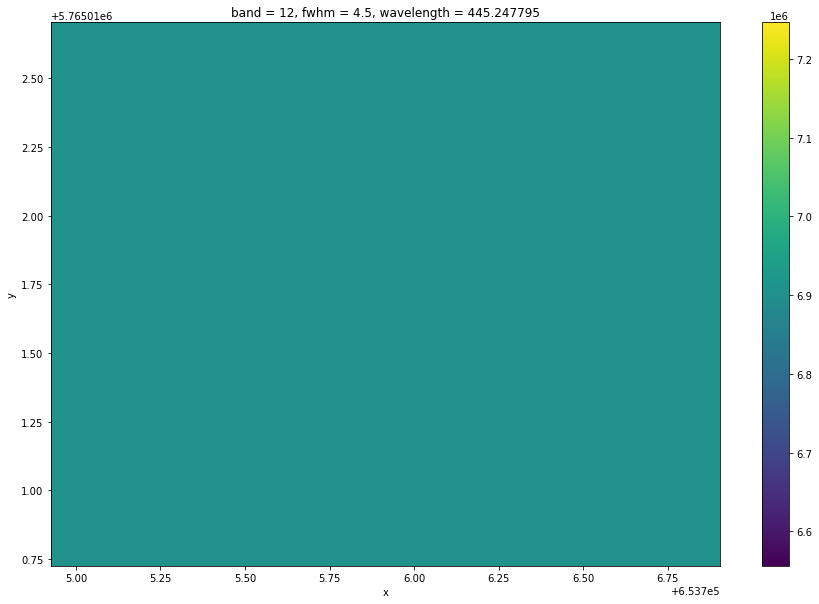

In [113]:
(((spx1.wavelength * 1e-9*microns2_to_m2(3.1))/2e-25)*spx_1).isel(wavelength=11).plot(size=10)

In [ ]:
def irradiance_to_flux(ar):
    

In [2]:
s.ground_reflectance = GroundReflectance.HomogeneousLambertian(0)

In [3]:
tau = .8
A_p = 

In [39]:
1.98644586e-25

1.98644586e-25

In [ ]:
def 

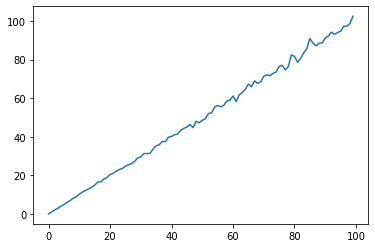

In [89]:
plt.plot(np.random.normal(np.arange(0,100),np.arange(0,100)/50))

In [65]:
_hc = 1.98644586e-25
def N_e(L_in, tau, A_pixel, omega, t_integration, lambda_, nu):
    """
    Number of electrons captured by a pixel
    
    Parameters
    ----------
    L_in : float
        integrated mean irradiance over band
    tau : float
        Mean transmittance over band
    A_pixel : float
        Area of pixel (m2)
    omega : float
        pixel field of view (steradians)
    t_integration : float
        integration time
    lambda_ : float, array
        wavelengths
    nu : float
        Mean quantum efficiency over band
    """
    return L_in * tau * A_pixel * omega * t_integration * ((lambda_/1e9)/_hc) * nu

def B(tau, A_pixel, omega, t_integration, lambda_, nu):
    """
    Number of electrons captured by a pixel
    
    Parameters
    ----------
    tau : float
        Mean transmittance over band
    A_pixel : float
        Area of pixel (m2)
    omega : float
        pixel field of view (steradians)
    t_integration : float
        integration time
    lambda_ : float, array
        wavelengths
    nu : float
        Mean quantum efficiency over band
    """
    return 1/(tau * A_pixel * omega * t_integration * ((lambda_/1e9)/_hc) * nu)

def Ne_dL(A, B, L):
    return np.sqrt(A+(B*L))

def SNR(A, B, L):
    return L/Ne_dL(A, B, L)

In [76]:
B(.8, (16*16)/1e6, .1, .017, 600, .8)

1.1886571906594667e-11

In [81]:
SNR(0, B(.8, (.16*.16)/1e6, .5, .01, 600, .5), .00000001)

1.2435757344566973

In [4]:
spx2 = xarray.open_dataset(datasets.TEST_HSI, chunks=2).swap_dims(
        {'band': 'wavelength'}
    )

In [5]:
sm = spectral.Sentinel2A()

In [6]:
spx2

<xarray.Dataset>
Dimensions:      (wavelength: 186, x: 6, y: 6)
Coordinates:
    band         (wavelength) int64 1 2 3 4 5 6 7 ... 181 182 183 184 185 186
  * y            (y) float64 5.765e+06 5.765e+06 ... 5.765e+06 5.765e+06
  * x            (x) float64 6.537e+05 6.537e+05 ... 6.537e+05 6.537e+05
    fwhm         (wavelength) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * wavelength   (wavelength) float64 410.1 413.3 416.5 ... 998.2 1.001e+03
Data variables:
    reflectance  (wavelength, y, x) uint16 dask.array<chunksize=(2, 2, 2), meta=np.ndarray>

In [9]:
spx2.pipe(sm.transform)

ValueError: zero-size array to reduction operation fmin which has no identity

In [8]:
# wlen = spc.to_pandas().values
# ref = spc.to_pandas().values

In [62]:
rho = np.linspace(0,.3,100)
test_response = (np.stack([results]*100).T*rho).T

In [97]:
lut = xarray.DataArray(test_response, coords=[('rho',rho),('wavelength', wavelengths*1000)])

In [98]:
lut2 = lut.expand_dims(solar_z=[250])

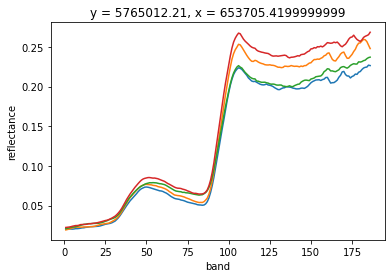

In [99]:
spc.isel(x=0,y=0).plot()
spc.isel(x=0,y=1).plot()
spc.isel(x=1,y=0).plot()
spc.isel(x=1,y=1).plot()

In [107]:
spc

<xarray.DataArray 'reflectance' (band: 186, y: 6, x: 6)>
array([[[0.0211, 0.0207, 0.0231, 0.0248, 0.0258, 0.0255],
        [0.0193, 0.0224, 0.0222, 0.023 , 0.0278, 0.0236],
        [0.0205, 0.0215, 0.0213, 0.0179, 0.0215, 0.02  ],
        [0.0205, 0.0242, 0.0209, 0.0203, 0.0197, 0.0181],
        [0.0226, 0.022 , 0.0227, 0.0174, 0.019 , 0.02  ],
        [0.0216, 0.022 , 0.0221, 0.0229, 0.019 , 0.0215]],

       [[0.0207, 0.0214, 0.0228, 0.0251, 0.0257, 0.0255],
        [0.0198, 0.0226, 0.0227, 0.0233, 0.0268, 0.024 ],
        [0.0214, 0.0219, 0.0213, 0.0185, 0.0218, 0.0208],
        [0.0214, 0.0248, 0.0208, 0.0205, 0.0195, 0.0192],
        [0.0223, 0.0219, 0.0233, 0.0177, 0.0193, 0.0201],
        [0.0217, 0.0219, 0.0223, 0.0232, 0.0193, 0.0214]],

       [[0.0206, 0.0218, 0.0224, 0.0255, 0.0254, 0.0257],
        [0.0203, 0.0229, 0.0233, 0.0238, 0.0263, 0.0247],
        [0.0225, 0.0219, 0.0217, 0.0189, 0.022 , 0.0217],
        [0.0221, 0.0251, 0.0209, 0.0206, 0.0193, 0.02  ],
        [0.0222, 0.0217, 0.0238, 0.018 , 0.0194, 0.0202],
        [0.022 , 0.0217, 0.0226, 0.0237, 0.0194, 0.0213]],
...
       [[0.2246, 0.2352, 0.2202, 0.2352, 0.233 , 0.2383],
        [0.2567, 0.2643, 0.2486, 0.2389, 0.2464, 0.2154],
        [0.249 , 0.2146, 0.2378, 0.2252, 0.215 , 0.2295],
        [0.2237, 0.2232, 0.2289, 0.2249, 0.2191, 0.2239],
        [0.2259, 0.2191, 0.1985, 0.2296, 0.229 , 0.2116],
        [0.2328, 0.2191, 0.2291, 0.2256, 0.229 , 0.2232]],

       [[0.227 , 0.2365, 0.2203, 0.2344, 0.2343, 0.2391],
        [0.2524, 0.2654, 0.2516, 0.2414, 0.2478, 0.216 ],
        [0.2517, 0.213 , 0.2397, 0.2276, 0.2178, 0.2315],
        [0.2242, 0.2242, 0.2309, 0.2223, 0.2187, 0.2269],
        [0.2297, 0.2231, 0.2024, 0.2294, 0.228 , 0.2126],
        [0.2342, 0.2231, 0.2307, 0.229 , 0.228 , 0.2276]],

       [[0.2265, 0.2371, 0.219 , 0.2321, 0.234 , 0.2365],
        [0.2479, 0.2685, 0.2521, 0.2425, 0.2493, 0.2187],
        [0.2531, 0.2117, 0.2404, 0.2288, 0.219 , 0.2321],
        [0.2248, 0.2252, 0.2309, 0.2202, 0.217 , 0.2293],
        [0.2304, 0.2243, 0.2044, 0.2295, 0.2281, 0.2103],
        [0.2373, 0.2243, 0.2331, 0.23  , 0.2281, 0.233 ]]])
Coordinates:
  * band        (band) int64 1 2 3 4 5 6 7 8 ... 179 180 181 182 183 184 185 186
  * y           (y) float64 5.765e+06 5.765e+06 ... 5.765e+06 5.765e+06
  * x           (x) float64 6.537e+05 6.537e+05 ... 6.537e+05 6.537e+05
    fwhm        (band) float64 ...
    wavelength  (band) float64 410.1 413.3 416.5 419.7 ... 995.0 998.2 1.001e+03

In [155]:
spc = spc.swap_dims({'band':'wavelength'})

In [166]:
new = lut2.sel(rho=spc, wavelength=spc.wavelength, method='nearest').drop_vars('rho')

In [178]:
lut2.dims

('solar_z', 'rho', 'wavelength')

In [176]:
lut2.sel(**{'solar_z':250, 'rho':slice(0,.2,1)})

<xarray.DataArray (rho: 67, wavelength: 200)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.22051515e-01, 3.31003030e-01, 3.44939394e-01, ...,
        7.78787879e-04, 2.73030303e-03, 6.06060606e-06],
       [6.44103030e-01, 6.62006061e-01, 6.89878788e-01, ...,
        1.55757576e-03, 5.46060606e-03, 1.21212121e-05],
       ...,
       [2.06112970e+01, 2.11841939e+01, 2.20761212e+01, ...,
        4.98424242e-02, 1.74739394e-01, 3.87878788e-04],
       [2.09333485e+01, 2.15151970e+01, 2.24210606e+01, ...,
        5.06212121e-02, 1.77469697e-01, 3.93939394e-04],
       [2.12554000e+01, 2.18462000e+01, 2.27660000e+01, ...,
        5.14000000e-02, 1.80200000e-01, 4.00000000e-04]])
Coordinates:
    solar_z     int64 250
  * rho         (rho) float64 0.0 0.00303 0.006061 0.009091 ... 0.1939 0.197 0.2
  * wavelength  (wavelength) float64 400.0 405.0 410.0 ... 1.39e+03 1.395e+03

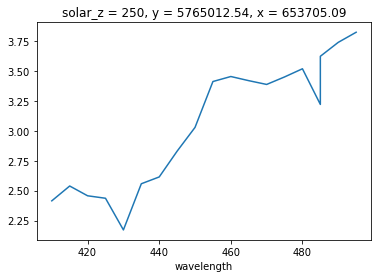

In [162]:
new.sel(wavelength=slice(400,500,1)).isel(x=0,y=0).plot()

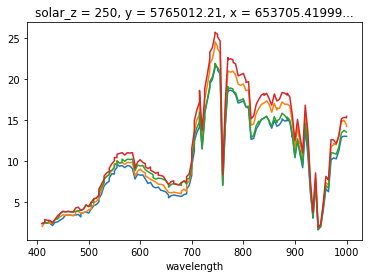

In [160]:
new.isel(x=0,y=0).plot()
new.isel(x=0,y=1).plot()
new.isel(x=1,y=0).plot()
new.isel(x=1,y=1).plot()

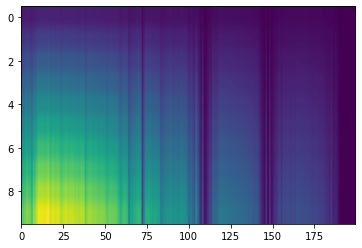

In [34]:
plt.imshow(, aspect='auto')

In [ ]:
xarray.DataArray()

In [17]:
wavelengths

array([0.4  , 0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 ,
       0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485,
       0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 ,
       0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575,
       0.58 , 0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 ,
       0.625, 0.63 , 0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665,
       0.67 , 0.675, 0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 ,
       0.715, 0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755,
       0.76 , 0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  ,
       0.805, 0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845,
       0.85 , 0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 ,
       0.895, 0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935,
       0.94 , 0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 ,
       0.985, 0.99 , 0.995, 1.   , 1.005, 1.01 , 1.015, 1.02 , 1.025,
       1.03 , 1.035,

Running for many wavelengths - this may take a long time


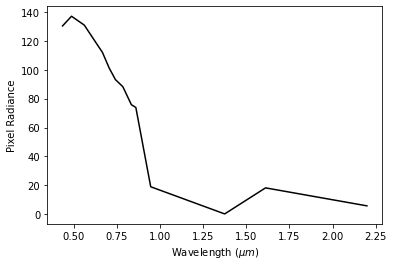

In [18]:
from Py6S import *
# Create a SixS object called s (used as the standard name by convention)
s = SixS()
# Run the 6S simulation defined by this SixS object across the
# whole VNIR range
wavelengths, results = SixSHelpers.Wavelengths.run_s2a_msi(s, output_name="pixel_radiance")
# Plot these results, with the y axis label set to "Pixel Radiance"
SixSHelpers.Wavelengths.plot_wavelengths(wavelengths, results, "Pixel Radiance")

Running for many angles - this may take a long time


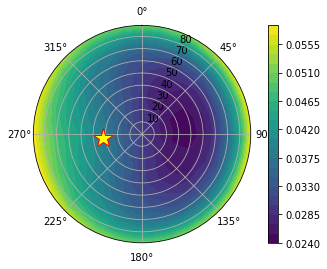

(<Figure size 432x288 with 2 Axes>, <PolarAxesSubplot:>)

In [17]:
s = SixS()
# Set the ground reflectance to have some sort of BRDF, or the plot will
# be really boring! In this case, we're using the Roujean model
s.ground_reflectance = GroundReflectance.HomogeneousRoujean(0.037, 0.0, 0.133)
# Run the model and plot the results, varying the view angle (the other
#  option is to vary the solar angle) and plotting the pixel reflectance.
SixSHelpers.Angles.run_and_plot_360(s, 'view', 'pixel_reflectance')

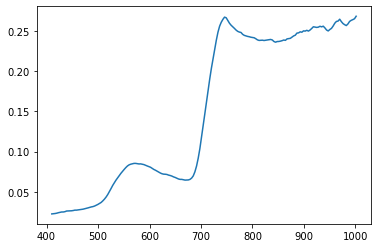

In [59]:
plt.plot(wlen, ref)

In [113]:
# wavelength needs to be in microns 
test_spectrum = np.stack([wlen/1000,ref]).T

In [128]:
s = SixS()
s.ground_reflectance = GroundReflectance.HomogeneousLambertian(test_spectrum)
# Bear in mind this will produce a result for a single Wavelength
# To see what the whole spectrum will look like after atmospheric
# radiative transfer has taken place you must run for multiple wavelengths
# For example
wavelengths1, reflectances1 = SixSHelpers.Wavelengths.run_s2a_msi(s, output_name="apparent_radiance")
s = SixS()
s.ground_reflectance = GroundReflectance.HomogeneousLambertian(1)
wavelengths2, reflectances2 = SixSHelpers.Wavelengths.run_s2a_msi(s, output_name="apparent_radiance")



Running for many wavelengths - this may take a long time
Running for many wavelengths - this may take a long time


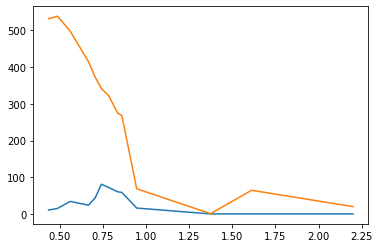

In [129]:
plt.plot(wavelengths1, reflectances1)
plt.plot(wavelengths2, reflectances2)

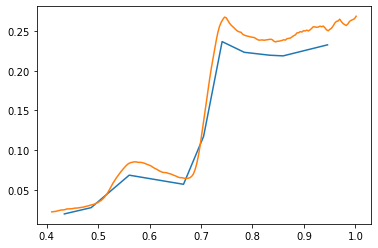

In [134]:
plt.plot(wavelengths1[:10], (reflectances1/reflectances2)[:10])
plt.plot(wlen/1000, ref)

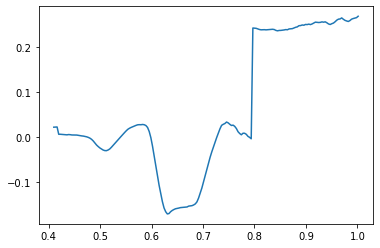

In [125]:
plt.plot(wlen/1000, ref-(reflectances1/reflectances2)[:186])

In [126]:
s.sixs_path

'/Users/joe/opt/anaconda3/envs/py6s-env/bin/sixs'

In [13]:
s.ground_reflectance

['0 Homogeneous surface\n0 No directional effects\n0\n0.3\n', 0.3]